### Exponential decay model
If we expect an exponential decay, the model should be non linear as it can be approximated as an infinite series of polynomials.
Given the exponential decaying model $N(t)=N_0e^{-\lambda t}$,
good parameters guesses would be $N_0 = 1.25$ and $\lambda = 100$, the later estimated by looking at the half-life by looking at the plot below.

$ Am^T*N^-1*Am*dm=Am^T*N^-1*r$

In [8]:
def exponential_decay(t, p): # p = ([N0, lamda])
    
    N = len(t)
    new_y = np.zeros(N)
    for i in range (N):
        new_y[i] = p[0] * np.exp(-p[1]*t[i])
    
    plt.plot(t, new_y)
    grad = np.zeros([t.size, p.size])
    grad[:,0] = np.exp(-p[1] * t)
    grad[:,1] = -p[1]*p[0]*np.exp(-p[1] * t)
    return new_y, grad # predictions and gradients

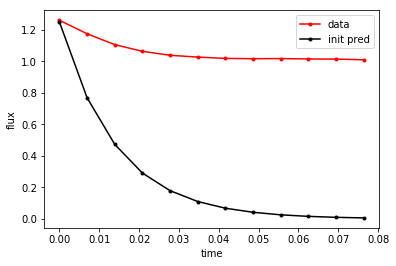

In [20]:
import numpy as np
import matplotlib.pyplot as plt

data = np.transpose(np.loadtxt('229614158_PDCSAP_SC6.txt',delimiter=','))
# optical light curve from a flaring M-dward star observed by the HESS telescope
# source : Matt Lundy
# first column = time
# second column = flux
# third colum -> ignore

# Set left and right time values to slice the data
a = 1706.52314133376
b = 1706.60647466709

inda = np.where(data[0] == a)
indb = np.where(data[0] == b)
t = data[0][int(inda[0]): int(indb[0]):] - a # time starts at 0
y = data[1][int(inda[0]): int(indb[0]):]

p = np.zeros([2,1]) # p - initial guess
p[0,0] = 1.25 # N0
p[1,0] = 70 # lamda
y_pred, grad = exponential_decay(t,p)

plt.clf()
plt.plot(t, y, 'r.-', label="data")
plt.plot(t, y_pred, 'k.-', label="init pred")
plt.legend()
#plt.xlim(left=0, right=b-a)
plt.xlabel("time")
plt.ylabel("flux")
plt.show()

The Newton-Raphson method essentially consists of minimizing ${\chi}^2$ by solving for dm in the equation:
$$A_m^TN^{-1}A_mdm=A_m^TN^{-1}r$$
and then to the iteration $m_0 \rightarrow m_0 + dm$ to change the guess of the parameters.

In [75]:
num_iterations = 1

# Am^T*N^-1*Am*dm=Am^T*N^-1*r
# m0 -> m0 + dm
for i in range(num_iterations):
    y_pred, Am = exponential_decay(t,p)
    r = y - y_pred # d-A(m)->r
    err=(r**2).sum()
    r = np.matrix(r)
    r = np.transpose(r)
    Am = np.matrix(Am)
    
    lhs = Am.transpose()*Am # Am^T*N^-1*Am
    rhs = np.dot(Am.transpose(), r) # Am^T*N^-1*r
    print(lhs)
    dm = np.dot(np.linalg.inv(lhs), rhs)
    p = p+dm
    
    print(p)
    print(err)
    print('\n')

plt.plot(t, y, 'k.-')
#plt.plot(t,y_pred)
plt.xlabel("time")
plt.ylabel("flux")
plt.show()

[[ 9.81494974 -3.68060615]
 [-3.68060615  1.38022731]]


LinAlgError: Singular matrix